In [1]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook has been run last on 21/10/2016 at 15:11:13.


In [ ]:
# %load /Users/Gonzalo/github/IC/Config/DIOMIRA_default.csv
#Configuration file for DIOMIRA
PATH_IN,PATH_OUT,FILE_IN,FILE_OUT,PATH_DB,FIRST_EVT,LAST_EVT,RUN_ALL,BLR,NOISE_CUT,CLIB,CLEVEL
/Users/Gonzalo/github/IC/data/,/Users/Gonzalo/github/IC/data/,in0.h5,DIOMIRA500.h5,/Users/Gonzalo/github/IC/Database/,0,500,1,1,0.9,zlib,5


# DIOMIRA

In [22]:
try:
    h5f.close()
except:
    pass

In [23]:
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/DIOMIRA500_bkup.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/DIOMIRA500_bkup.h5 (File) ''
Last modif.: 'Fri Oct 21 14:47:27 2016'
Object Tree: 
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(4144,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/pmtrwf (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/sipmrwf (EArray(500, 1789, 800), shuffle, zlib(5)) ''
/Sensors (Group) ''
/Sensors/DataBLR (Table(12,)) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(7008,), shuffle, zlib(5)) 'Store for PMTs TWF'
/TWF/SiPM (Table(44112,), shuffle, zlib(5)) 'Store for SiPM TWF'



In [24]:
fee_tabl = h5f.root.MC.FEE

pmttwf   = h5f.root.TWF.PMT
sipmtwf  = h5f.root.TWF.SiPM

pmtblr   = h5f.root.RD.pmtblr
pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf

pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
blrdf    = snf.read_data_sensors(h5f.root.Sensors.DataBLR)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

### PMT DF:

In [25]:
print(pmtdf)

    adc_to_pes  channel     coeff  noise_rms           x           y
0    19.612494        0  0.001641    9.69957  -23.941401   65.778503
1    18.113808        1  0.001623   10.73670  -44.995098  -53.623100
2    20.471638        2  0.000000    9.27125   68.936501  -12.155400
3    18.384705        3  0.000000    9.88896   -0.000000  185.000000
4    18.154816        4  0.001596    8.32661 -118.916000  141.718002
5    19.496326        5  0.001581    7.03380 -182.188995   32.124901
6    17.458265        6  0.000000    7.85048 -160.214996  -92.500000
7    18.035641        7  0.000000   12.01220  -63.273701 -173.843002
8    20.184763        8  0.001622    7.18150   63.273701 -173.843002
9    21.031563        9  0.001601    8.72723  160.214996  -92.500000
10   18.573696       10  0.000000    7.20675  182.188995   32.124901
11   19.356398       11  0.000000    8.16961  118.916000  141.718002


### BLR DF:

In [26]:
print(blrdf)

    adc_to_pes  channel     coeff  noise_rms           x           y
0    20.049252        0  0.001641    9.69957  -23.941401   65.778503
1    18.536999        1  0.001623   10.73670  -44.995098  -53.623100
2    20.905739        2  0.000000    9.27125   68.936501  -12.155400
3    18.808155        3  0.000000    9.88896   -0.000000  185.000000
4    18.573059        4  0.001596    8.32661 -118.916000  141.718002
5    19.928192        5  0.001581    7.03380 -182.188995   32.124901
6    17.884335        6  0.000000    7.85048 -160.214996  -92.500000
7    18.459351        7  0.000000   12.01220  -63.273701 -173.843002
8    20.610142        8  0.001622    7.18150   63.273701 -173.843002
9    21.449465        9  0.001601    8.72723  160.214996  -92.500000
10   18.998362       10  0.000000    7.20675  182.188995   32.124901
11   19.773834       11  0.000000    8.16961  118.916000  141.718002


### FEE table:

In [27]:
for i in fee_tabl.colnames: print(i, '->', fee_tabl.col(i)[0])

offset -> 2500
ceiling -> 4096
pmt_gain -> 4.5e+06
V_gain -> 4.00544e-14
R -> 3.76512e-13
time_step -> 1.0
time_daq -> 25.0
freq_LPF -> 0.003
freq_HPF -> 1.09235e-05
LSB -> 4.88281e-10
volts_to_adc -> 0.000390625
noise_fee_rms -> 3e-10
noise_adc -> 0.768
C12 -> [  3.76347497e+16   3.88563243e+16   3.78680523e+16   3.88321222e+16
   3.93214779e+16   3.80664712e+16   3.85905732e+16   3.88081648e+16
   3.86540657e+16   3.93538705e+16   3.87198002e+16   3.93983363e+16]
AC -> [ 0.00165235  0.00163149  0.00163177  0.00162948  0.00158202  0.00159469
  0.00162493  0.00164257  0.00162681  0.00162087  0.00160063  0.00161127]
CR -> [ 19.61249352  18.11380768  20.47163773  18.38470459  18.15481567
  19.49632645  17.4582653   18.03564072  20.18476295  21.03156281
  18.57369614  19.35639763]
CB -> [ 20.04925156  18.53699875  20.90573883  18.80815506  18.57305908
  19.92819214  17.88433456  18.45935059  20.61014175  21.4494648
  18.99836159  19.77383423]


### Plot of the PMT TWF, RWF, BLR for event 0, PMT 0

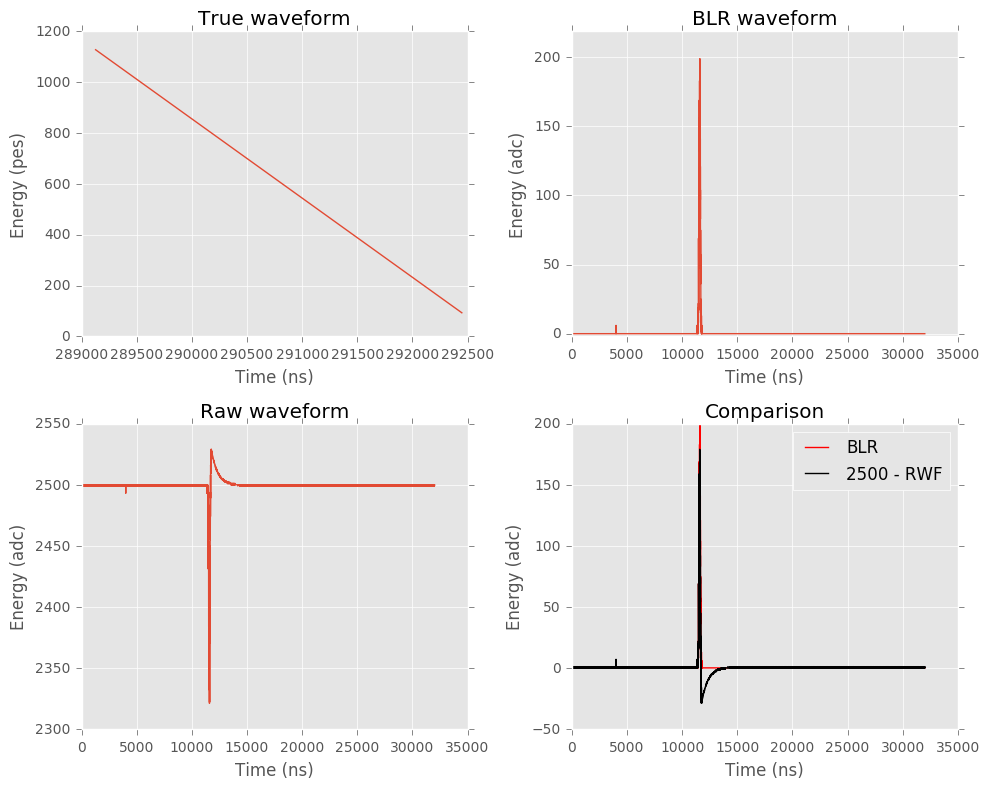

In [28]:
Tt, Te = tbl.read_wf(pmttwf,0,0)

fig, axes = plt.subplots(2,2)
axes[0,0].plot(Tt,Te)
axes[0,1].plot(pmtblr[0,0]);axes[0,1].set_ylim((-2,1.1*pmtblr[0,0].max()))
axes[1,0].plot(pmtrwf[0,0])
axes[1,1].plot(pmtblr[0,0],'r',label='BLR')
axes[1,1].plot(2500-pmtrwf[0,0],'k',label='2500 - RWF')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (pes)');axes[0,0].set_title('True waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (adc)');axes[0,1].set_title('BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (adc)');axes[1,0].set_title('Raw waveform')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (adc)');axes[1,1].set_title('Comparison')

axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

# ISIDORA

In [15]:
try:
    h5f.close()
except:
    pass

In [16]:
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/ISIDORA500_bkup.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/ISIDORA500_bkup.h5 (File) ''
Last modif.: 'Fri Oct 21 14:53:47 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/mau (EArray(500, 32000), shuffle, zlib(5)) ''
/BLR/pulse_on (EArray(500, 32000), shuffle, zlib(5)) ''
/BLR/wait_over (EArray(500, 32000), shuffle, zlib(5)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(4144,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/pmtcwf (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/pmtrwf (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/sipmrwf (EArray(500, 1789, 800), shuffle, zlib(5)) ''
/Sensors (Group) ''
/Sensors/DataBLR (Table(12,)) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(7008,), shuffle, zlib(5)) 'Store for PMTs TWF'
/TWF/SiPM (Table(44112,), shuffle, zlib(5)) 'Store for SiPM TWF'



In [17]:
fee_tabl = h5f.root.MC.FEE

pmttwf   = h5f.root.TWF.PMT
sipmtwf  = h5f.root.TWF.SiPM

blrmau   = h5f.root.BLR.mau
blrpulse = h5f.root.BLR.pulse_on
blrwait  = h5f.root.BLR.wait_over

pmtcwf   = h5f.root.RD.pmtcwf
pmtblr   = h5f.root.RD.pmtblr
pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf

pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
blrdf    = snf.read_data_sensors(h5f.root.Sensors.DataBLR)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

### Plot of the RWF, BLR and CWF for event 0 PMT 0:

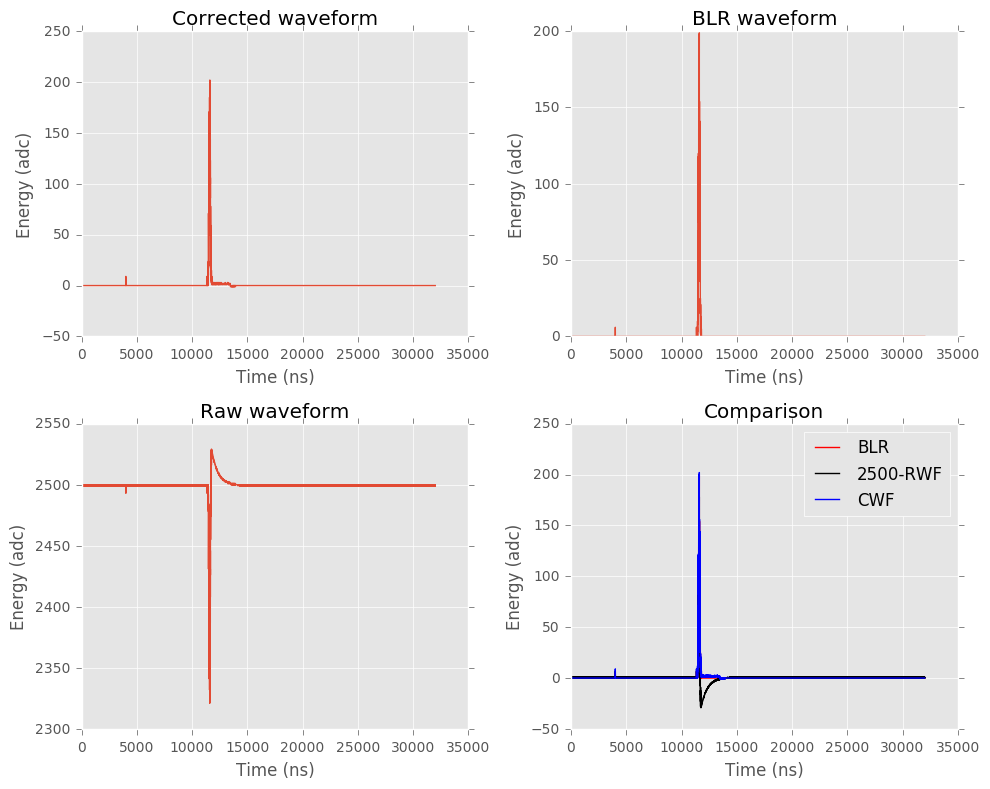

In [20]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(pmtcwf[0,0])
axes[0,1].plot(pmtblr[0,0])
axes[1,0].plot(pmtrwf[0,0])
axes[1,1].plot(pmtblr[0,0],'r',label='BLR')
axes[1,1].plot(2500-pmtrwf[0,0],'k',label='2500-RWF')
axes[1,1].plot(pmtcwf[0,0],'b',label='CWF')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (adc)');axes[0,0].set_title('Corrected waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (adc)');axes[0,1].set_title('BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (adc)');axes[1,0].set_title('Raw waveform')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (adc)');axes[1,1].set_title('Comparison')

axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

### Plot of the mau, pulse_on and wait_over variables for event 0

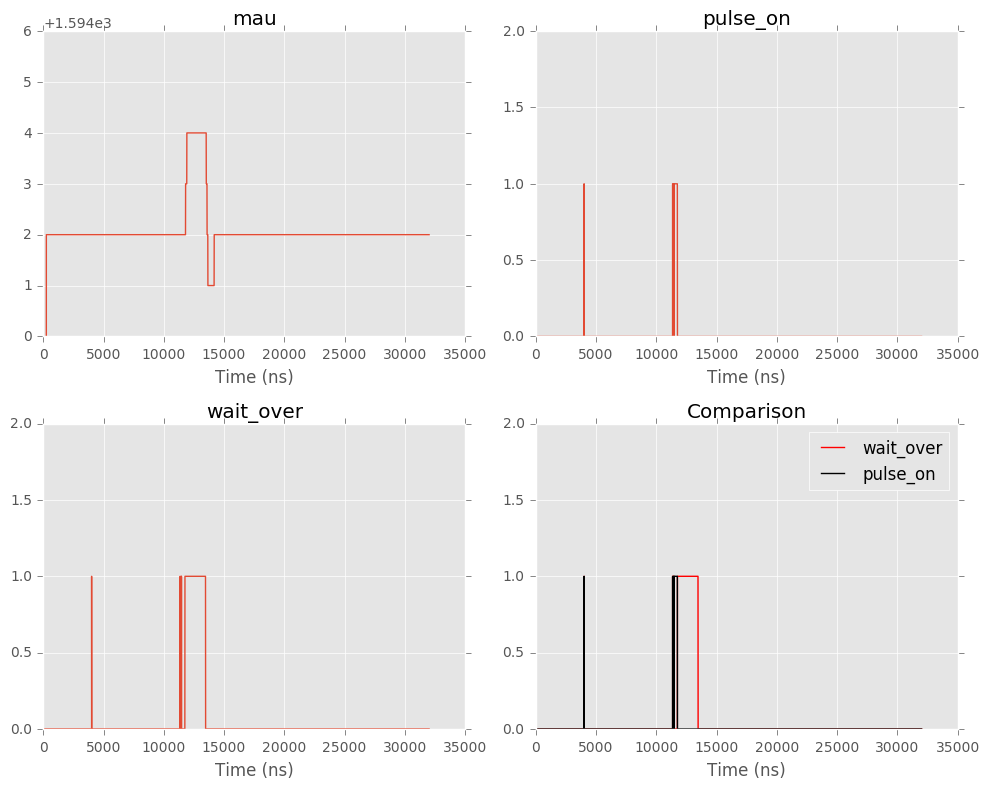

In [21]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(blrmau[0])
axes[0,1].plot(blrpulse[0])
axes[1,0].plot(blrwait[0])
axes[1,1].plot(blrwait[0],'r',label='wait_over')
axes[1,1].plot(blrpulse[0],'k',label='pulse_on')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylim((1594,1600));axes[0,0].set_title('mau')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylim((0,2));axes[0,1].set_title('pulse_on')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylim((0,2));axes[1,0].set_title('wait_over')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylim((0,2));axes[1,1].set_title('Comparison')

axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

# ANASTASIA

In [29]:
try:
    h5f.close()
except:
    pass

In [30]:
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/ANASTASIA500_bkup.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/ANASTASIA500_bkup.h5 (File) ''
Last modif.: 'Fri Oct 21 15:10:20 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/mau (EArray(500, 32000), shuffle, zlib(5)) ''
/BLR/pulse_on (EArray(500, 32000), shuffle, zlib(5)) ''
/BLR/wait_over (EArray(500, 32000), shuffle, zlib(5)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(4144,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/pmtcwf (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/pmtrwf (EArray(500, 12, 32000), shuffle, zlib(5)) ''
/RD/sipmrwf (EArray(500, 1789, 800), shuffle, zlib(5)) ''
/Sensors (Group) ''
/Sensors/DataBLR (Table(12,)) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(7008,), shuffle, zlib(5)) 'Store for PMTs TWF'
/TWF/SiPM (Table(44112,), shuffle, zlib(5)) 'Store for SiPM TWF'
/ZS (Group) ''
/ZS/B

In [31]:
fee_tabl = h5f.root.MC.FEE

pmttwf   = h5f.root.TWF.PMT
sipmtwf  = h5f.root.TWF.SiPM

blrmau   = h5f.root.BLR.mau
blrpulse = h5f.root.BLR.pulse_on
blrwait  = h5f.root.BLR.wait_over

pmtcwf   = h5f.root.RD.pmtcwf
pmtblr   = h5f.root.RD.pmtblr
pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf

pmtzswf  = h5f.root.ZS.PMT
blrzswf  = h5f.root.ZS.BLR
sipmzswf = h5f.root.ZS.SiPM

pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
blrdf    = snf.read_data_sensors(h5f.root.Sensors.DataBLR)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

### Plot of the ZS CWF, and BLR for event 0 (PMT-summed):

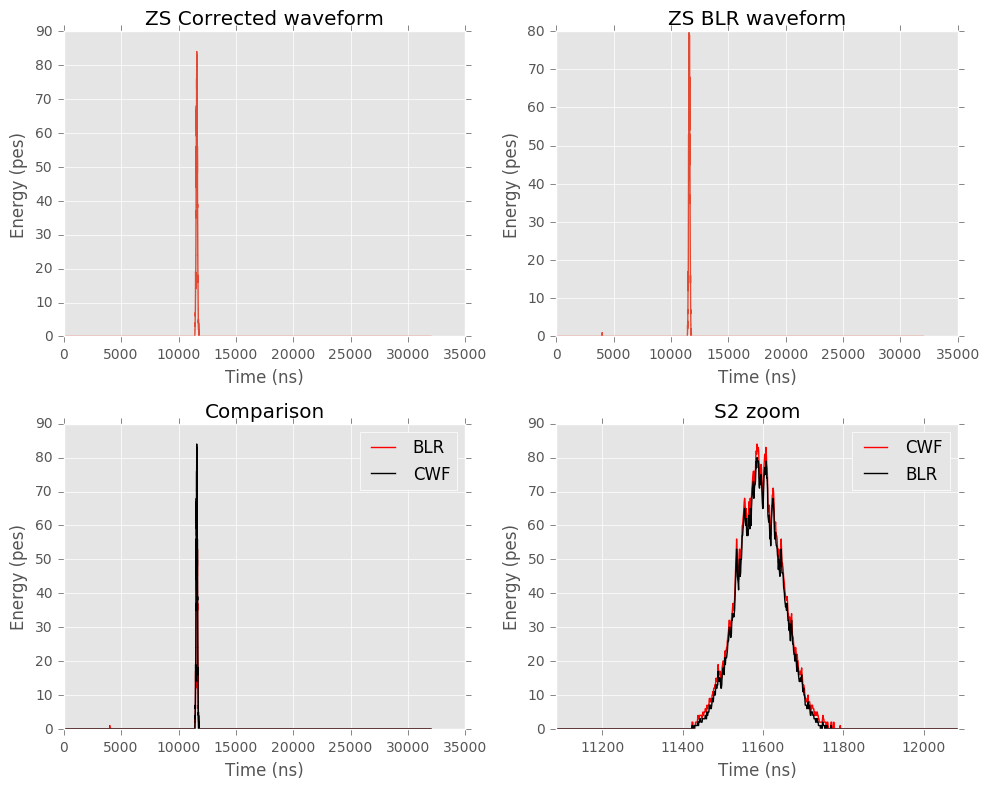

In [47]:
fig, axes = plt.subplots(2,2)
peak, window = np.argmax(pmtzswf[0,0]),500

axes[0,0].plot(pmtzswf[0,0])
axes[0,1].plot(blrzswf[0,0])
axes[1,0].plot(blrzswf[0,0],'r',label='BLR')
axes[1,0].plot(pmtzswf[0,0],'k',label='CWF')
axes[1,1].plot(pmtzswf[0,0],'r',label='CWF')
axes[1,1].plot(blrzswf[0,0],'k',label='BLR')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (pes)');axes[0,0].set_title('ZS Corrected waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (pes)');axes[0,1].set_title('ZS BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (pes)');axes[1,0].set_title('Comparison')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (pes)');axes[1,1].set_title('S2 zoom')
axes[1,1].set_xlim((peak-window,peak+window))

axes[1,0].legend()
axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

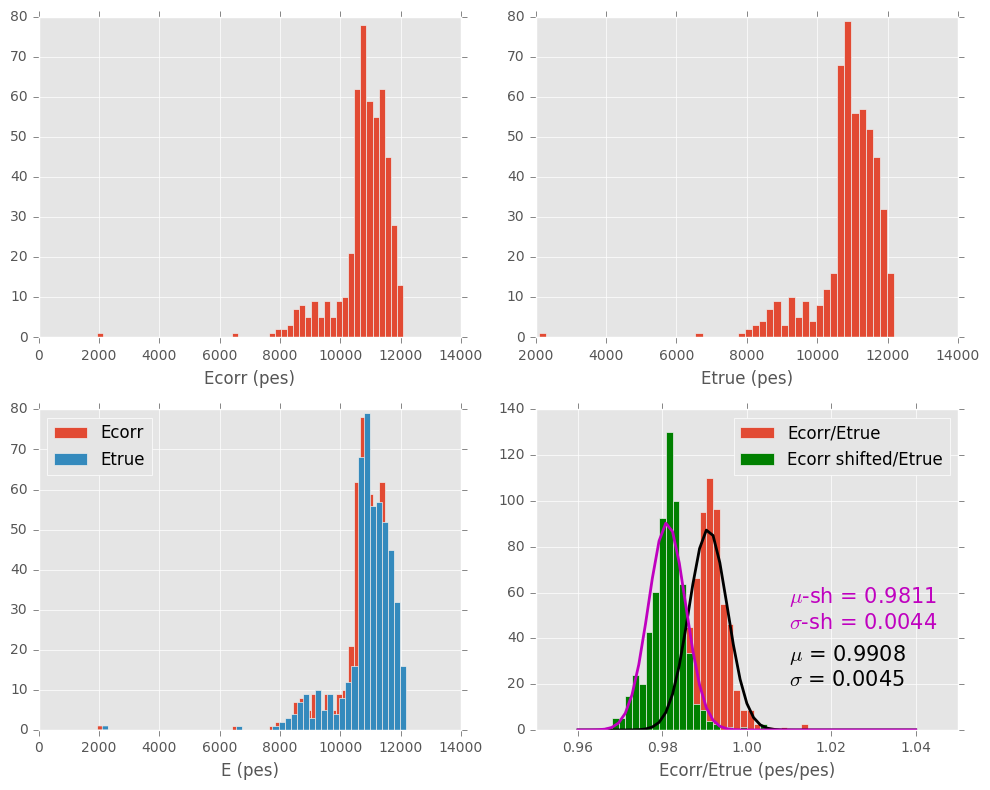

In [72]:
from scipy.stats import norm
import matplotlib.mlab as mlab

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(pmtzswf[i,0])
    Etrue[i] = tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,8)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Etrue')
axes[1,0].legend(loc='upper left')
hratio = axes[1,1].hist(Eratio,nbins,range=(0.96,1.04),normed=True,label='Ecorr/Etrue')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,range=(0.96,1.04),normed=True,label='Ecorr shifted/Etrue',color='g')
axes[1,1].legend()

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Etrue (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Etrue (pes/pes)')


bins = hratio[1]
mu,sigma = norm.fit(Eratio[ (Eratio>0.96) & (Eratio<1.04) ])
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr[ (EratioCorr>0.96) & (EratioCorr<1.04) ])
yC = mlab.normpdf( binsC, muC, sigmaC)

axes[1,1].text(1.01,20,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
axes[1,1].text(1.01,45,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()


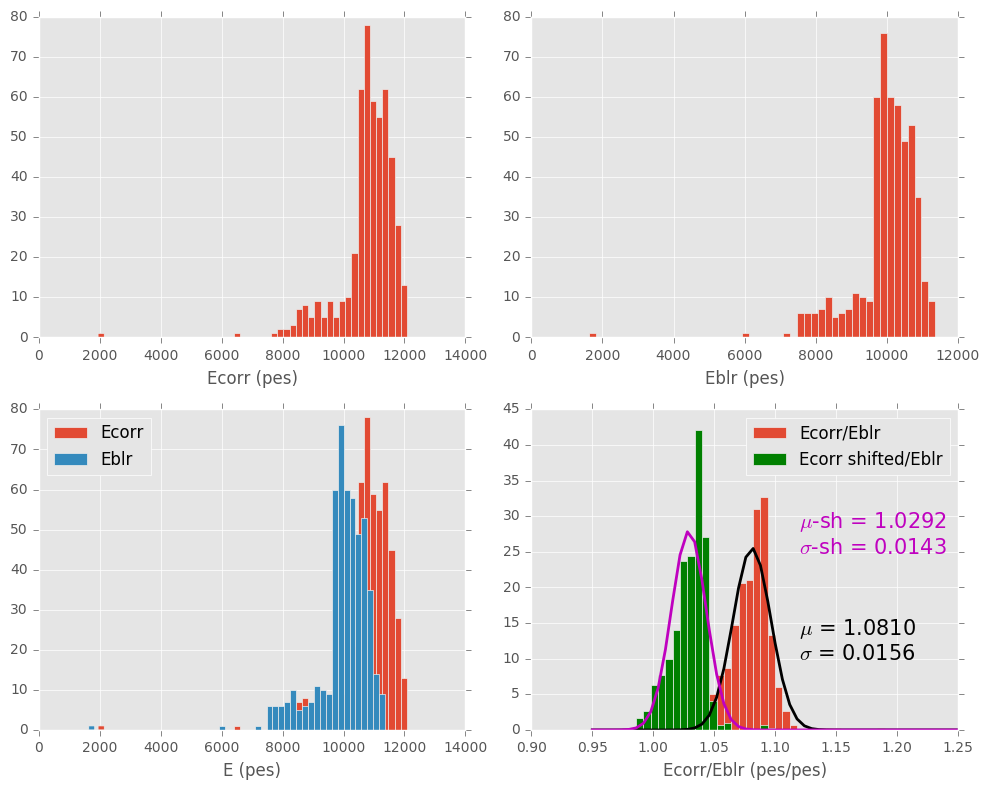

In [70]:
from scipy.stats import norm
import matplotlib.mlab as mlab

ratiorange = [0.95,1.25]

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(pmtzswf[i,0])
    Etrue[i] = np.sum(blrzswf[i,0])

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,8)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Eblr')
axes[1,0].legend(loc='upper left')
hratio = axes[1,1].hist(Eratio,nbins,range=ratiorange,normed=True,label='Ecorr/Eblr')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,range=ratiorange,normed=True,label='Ecorr shifted/Eblr',color='g')
axes[1,1].legend()

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Eblr (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Eblr (pes/pes)')

bins = hratio[1]
mu,sigma = norm.fit(Eratio[ (Eratio>ratiorange[0]) & (Eratio<ratiorange[1]) ])
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr[ (EratioCorr>ratiorange[0]) & (EratioCorr<ratiorange[1]) ])
yC = mlab.normpdf( binsC, muC, sigmaC)

axes[1,1].text(1.12,10,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
axes[1,1].text(1.12,25,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()
